In [1]:
#Import Libraries/Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

# Load the CSV file into a DataFrame
dataset = pd.read_csv(r'C:\Users\Dharshana\Downloads\Iris.csv')

# Display the first few rows of the DataFrame
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Shape of Dataset
dataset.shape

(150, 6)

In [5]:

# Dataset Columns
dataset.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:

#Dataset Summary
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:

#Dataset Statistical Summary
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
#Checking Null Values
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:

# To display no. of samples on each class.
dataset['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<AxesSubplot:ylabel='Species'>

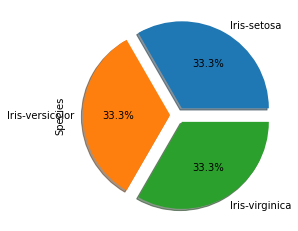

In [10]:
#Pie plot to show the overall types of Iris classifications
dataset['Species'].value_counts().plot(kind = 'pie',  autopct = '%1.1f%%', shadow = True, explode = [0.09,0.09,0.09])

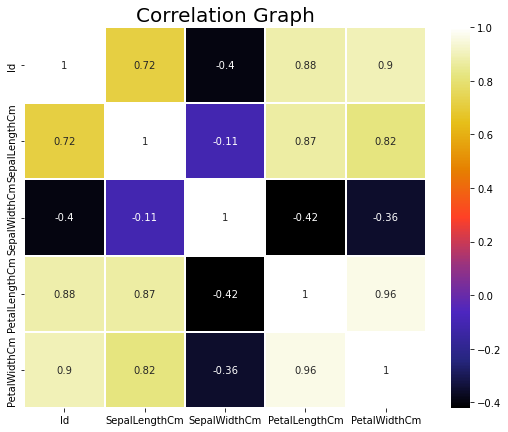

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 7))
sns.heatmap(dataset.corr(), cmap='CMRmap', annot=True, linewidths=2)
plt.title("Correlation Graph", size=20)
plt.show()

In [12]:
#Defining independent and dependent variables
features = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
X = dataset.loc[:, features].values   #defining the feature matrix
y = dataset.Species

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,random_state=0)

#Defining the decision tree classifier and fitting the training set
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(372.0, 498.3, 'petal length(cm) <= 2.35\ngini = 0.666\nsamples = 100\nvalue = [34, 31, 35]\nclass = Iris-virginica'),
 Text(279.0, 407.70000000000005, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]\nclass = Iris-setosa'),
 Text(465.0, 407.70000000000005, 'petal width(cm) <= 1.75\ngini = 0.498\nsamples = 66\nvalue = [0, 31, 35]\nclass = Iris-virginica'),
 Text(279.0, 317.1, 'petal length(cm) <= 5.05\ngini = 0.165\nsamples = 33\nvalue = [0, 30, 3]\nclass = Iris-versicolor'),
 Text(186.0, 226.5, 'petal width(cm) <= 1.65\ngini = 0.062\nsamples = 31\nvalue = [0, 30, 1]\nclass = Iris-versicolor'),
 Text(93.0, 135.89999999999998, 'gini = 0.0\nsamples = 29\nvalue = [0, 29, 0]\nclass = Iris-versicolor'),
 Text(279.0, 135.89999999999998, 'petal length(cm) <= 4.75\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = Iris-versicolor'),
 Text(186.0, 45.299999999999955, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Iris-virginica'),
 Text(372.0, 45.299999999999955, 'gini = 0.0\nsamples =

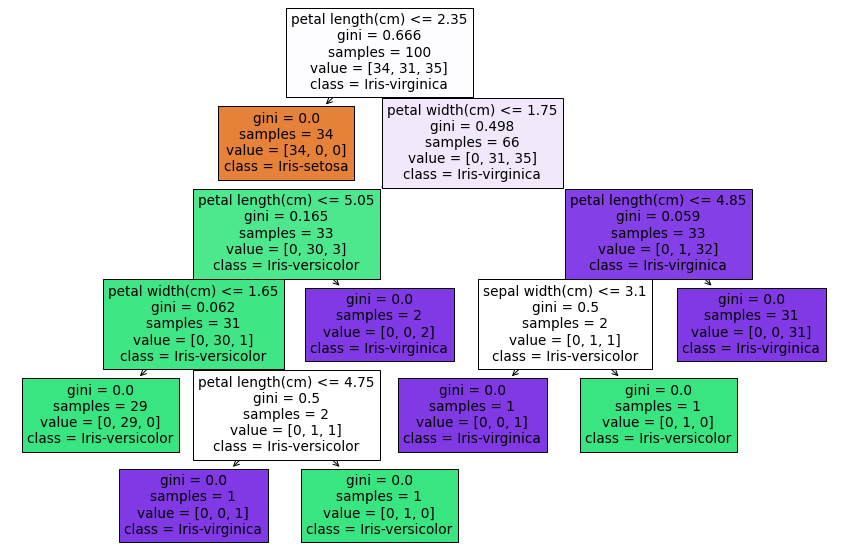

In [15]:
#Visualizing the decision tree
from sklearn import tree
feature_name =  ['sepal length(cm)','sepal width(cm)','petal length(cm)','petal width(cm)']
class_name= dataset.Species.unique()
plt.figure(figsize=(15,10))
tree.plot_tree(dtree, filled = True, feature_names = feature_name, class_names= class_name)
     

In [16]:
#Prediction on test data
y_pred = dtree.predict(X_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

In [18]:
from sklearn import metrics
     
#Checking the accuracy of the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.96


In [19]:

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.95      0.95      0.95        19
 Iris-virginica       0.93      0.93      0.93        15

       accuracy                           0.96        50
      macro avg       0.96      0.96      0.96        50
   weighted avg       0.96      0.96      0.96        50



In [20]:

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[16,  0,  0],
       [ 0, 18,  1],
       [ 0,  1, 14]], dtype=int64)

In [21]:
#Predicting the output class for random values for petal and sepal length and width
#Predict the flower type for a flower with sepal length, sepal width, petal length, petal width as 5cm, 3.6cm, 1.4cm and 0.2cm respectively

dtree.predict([[5, 3.6, 1.4 , 0.2]])

array(['Iris-setosa'], dtype=object)

In [22]:
#Predict the flower type for a flower with sepal length, sepal width, petal length, petal width as 9cm, 3.1cm, 5cm and 1.5cm respectively

dtree.predict([[9, 3.1, 5, 1.5]])

array(['Iris-versicolor'], dtype=object)

In [23]:
#Predict the flower type for a flower with sepal length, sepal width, petal length, petal width as 4.1cm, 3cm, 5.1cm and 1.8cm respectively

dtree.predict([[4.1, 3.0, 5.1, 1.8]])
     

array(['Iris-virginica'], dtype=object)